In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
from datetime import datetime


In [2]:
# Import our input dataset
#data1 = Path('/Users/halleh/Desktop/Resources/Fima_Flood_Payout/data_processing/merged_clean_3Years_df.csv')
data2 = Path('/Users/halleh/Desktop/Resources/UCB_Final_Project/Data/FEMA_cleaned14.csv')
FEMA_Clean14_df = pd.read_csv(data2)
FEMA_Clean14_df.head()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,state,reportedzipcode,year,month,season
0,OCEANSIDE,1998-02-07,999.0,X,33.2,-117.3,4.0,1.0,1963-01-01,0.00,CA,92056,1998,2,winter
1,NEW ORLEANS,2005-08-29,999.0,X,29.9,-90.0,2.0,1.0,1967-07-01,0.00,LA,70131,2005,8,summer
2,NAVARRE,1998-09-28,999.0,X,30.4,-86.9,1.0,1.0,1972-01-01,8813.21,FL,32566,1998,9,autumn
3,BEAUFORT,1994-10-07,999.0,X,32.4,-80.7,2.0,1.0,1960-01-01,2906.00,SC,29902,1994,10,autumn
4,MELBOURNE,1996-03-11,999.0,X,28.3,-80.7,1.0,1.0,1988-01-01,3875.53,FL,32940,1996,3,spring


In [3]:
#convert date columns to datetime64[ns] 
#only keep the builtyear and lossyear insted of the date
FEMA_Clean14_df['builtyear'] = pd.DatetimeIndex(FEMA_Clean14_df['originalconstructiondate']).year
FEMA_Clean14_df['lossyear'] = pd.DatetimeIndex(FEMA_Clean14_df['dateofloss']).year
FEMA_Clean14_df

,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,state,reportedzipcode,year,month,season,builtyear,lossyear
0,OCEANSIDE,1998-02-07,999.0,X,33.2,-117.3,4.0,1.0,1963-01-01,0.00,CA,92056,1998,2,winter,1963.0,1998
1,NEW ORLEANS,2005-08-29,999.0,X,29.9,-90.0,2.0,1.0,1967-07-01,0.00,LA,70131,2005,8,summer,1967.0,2005
2,NAVARRE,1998-09-28,999.0,X,30.4,-86.9,1.0,1.0,1972-01-01,8813.21,FL,32566,1998,9,autumn,1972.0,1998
3,BEAUFORT,1994-10-07,999.0,X,32.4,-80.7,2.0,1.0,1960-01-01,2906.00,SC,29902,1994,10,autumn,1960.0,1994
4,MELBOURNE,1996-03-11,999.0,X,28.3,-80.7,1.0,1.0,1988-01-01,3875.53,FL,32940,1996,3,spring,1988.0,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972390,MIAMI,2005-08-26,1.0,AHB,25.6,-80.4,1.0,1.0,1985-01-01,4390.96,FL,33177,2005,8,summer,1985.0,2005
1972391,MIAMI,2005-08-25,1.0,AHB,25.6,-80.4,1.0,1.0,1990-01-01,3541.59,FL,33186,2005,8,summer,1990.0,2005
1972392,PINECREST,2005-06-20,-1.0,AE,25.7,-80.3,1.0,1.0,1959-01-01,8335.35,FL,33156,2005,6,summer,1959.0,2005
1972393,PINECREST,2005-08-25,999.0,AE,25.7,-80.3,1.0,1.0,1959-01-01,2396.44,FL,33156,2005,8,summer,1959.0,2005


In [4]:
FEMA_df=FEMA_Clean14_df.drop(['reportedzipcode','dateofloss',	'numberoffloorsintheinsuredbuilding' ,'elevationdifference', 'year', 'reportedcity','originalconstructiondate', 'state','month', 'season' , 'latitude','longitude' ], axis = 1)#
FEMA_df

,floodzone,occupancytype,amountpaidonbuildingclaim,builtyear,lossyear
0,X,1.0,0.00,1963.0,1998
1,X,1.0,0.00,1967.0,2005
2,X,1.0,8813.21,1972.0,1998
3,X,1.0,2906.00,1960.0,1994
4,X,1.0,3875.53,1988.0,1996
...,...,...,...,...,...
1972390,AHB,1.0,4390.96,1985.0,2005
1972391,AHB,1.0,3541.59,1990.0,2005
1972392,AE,1.0,8335.35,1959.0,2005
1972393,AE,1.0,2396.44,1959.0,2005


In [5]:
#df.head(3)
FEMA_encoded = pd.get_dummies(FEMA_df, columns=["floodzone", "occupancytype"]).dropna() #"state"
#FEMA_encoded = pd.get_dummies(df, columns=["amountpaidonbuildingclaim"])
FEMA_encoded

,amountpaidonbuildingclaim,builtyear,lossyear,floodzone_000,floodzone_A,floodzone_A--,floodzone_A00,floodzone_A01,floodzone_A02,floodzone_A03,...,floodzone_V24,floodzone_V27,floodzone_V30,floodzone_VE,floodzone_X,occupancytype_1.0,occupancytype_2.0,occupancytype_3.0,occupancytype_4.0,occupancytype_6.0
0,0.00,1963.0,1998,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0.00,1967.0,2005,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,8813.21,1972.0,1998,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,2906.00,1960.0,1994,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,3875.53,1988.0,1996,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972390,4390.96,1985.0,2005,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1972391,3541.59,1990.0,2005,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1972392,8335.35,1959.0,2005,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1972393,2396.44,1959.0,2005,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


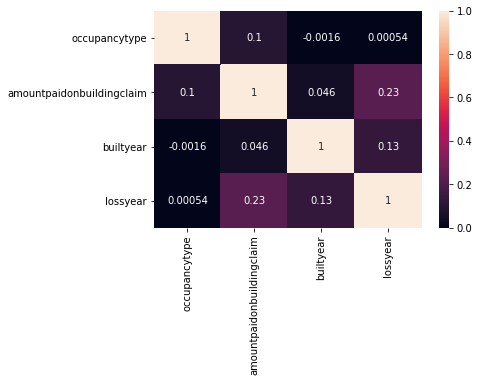

In [6]:
#generating a correlation matrix
corrMatrix = FEMA_df.corr()

import seaborn as sn
sn.heatmap(corrMatrix, annot=True)

In [7]:
y =  FEMA_encoded['amountpaidonbuildingclaim'] #.values
X =  FEMA_encoded.copy()#.values
X =  FEMA_encoded.drop(['amountpaidonbuildingclaim'], axis=1)

## Linear Regression

In [8]:
# [:1].values
# X.dtypes.values
# (X.iloc[:, 0] =='4   0').sum()

In [9]:
# pd.DataFrame(X.isna().sum())#.values


# # X.dropna()
# X.loc[X['builtyear'].isna()]

In [10]:
# Create a model with scikit-learn
model = LinearRegression()
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(1972394,)


In [11]:
y_pred

array([11120.91753745, 21484.51253803, 11645.02506968, ...,
       26543.47129205, 26543.47129205,  8539.23135064])

In [12]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [13]:
X_train.columns.tolist()

['builtyear',
 'lossyear',
 'floodzone_000',
 'floodzone_A',
 'floodzone_A--',
 'floodzone_A00',
 'floodzone_A01',
 'floodzone_A02',
 'floodzone_A03',
 'floodzone_A04',
 'floodzone_A05',
 'floodzone_A06',
 'floodzone_A07',
 'floodzone_A08',
 'floodzone_A09',
 'floodzone_A0B',
 'floodzone_A10',
 'floodzone_A11',
 'floodzone_A12',
 'floodzone_A13',
 'floodzone_A14',
 'floodzone_A15',
 'floodzone_A16',
 'floodzone_A17',
 'floodzone_A18',
 'floodzone_A19',
 'floodzone_A20',
 'floodzone_A21',
 'floodzone_A22',
 'floodzone_A23',
 'floodzone_A24',
 'floodzone_A25',
 'floodzone_A26',
 'floodzone_A27',
 'floodzone_A28',
 'floodzone_A29',
 'floodzone_A30',
 'floodzone_A4',
 'floodzone_A99',
 'floodzone_AA',
 'floodzone_AE',
 'floodzone_AH',
 'floodzone_AHB',
 'floodzone_AO',
 'floodzone_AO5',
 'floodzone_AOB',
 'floodzone_AR',
 'floodzone_B',
 'floodzone_C',
 'floodzone_D',
 'floodzone_OOO',
 'floodzone_V',
 'floodzone_V01',
 'floodzone_V02',
 'floodzone_V03',
 'floodzone_V04',
 'floodzone_V05',

In [14]:
model = LinearRegression() 
model.fit(X_train, y_train)

score_paid= model.score(X_test, y_test)
print (score_paid)

y_pred = model.predict(X_test)

df_paidpred = pd.DataFrame({'Actual Payoffs': y_test, 'Predicted Payoffs': y_pred})
df_paidpred

0.07172098679739236


,Actual Payoffs,Predicted Payoffs
287747,3104.29,38025.816755
1508149,108900.00,26437.109644
416940,56400.00,32085.936474
4673,56031.91,28419.690387
719720,69822.92,36933.213754
...,...,...
1723798,0.00,-3129.786263
1477307,0.00,25831.947817
298203,62106.91,40974.719401
1233673,15454.75,19769.794315


In [15]:
y_train

468617      17862.58
971259          0.00
1233963      3833.96
1404050         0.00
1683641      1538.58
             ...    
1529962         0.00
495656          0.00
1283992    100000.00
541143      19459.84
1415878      5271.05
Name: amountpaidonbuildingclaim, Length: 1479295, dtype: float64

## Logistic Regression

In [16]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, 
#                                                     random_state=1, 
#                                                     stratify=y)
# X_train.shape

In [17]:
# from sklearn.linear_model import LogisticRegression

# classifier = LogisticRegression(solver='lbfgs', random_state=1)
# classifier

In [18]:
# classifier.fit(X_train, y_train)

In [19]:
# y_pred = classifier.predict(X_test)
# results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
# results.head(20)

In [20]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))

## Polynomial Regression

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.show()

In [ ]:

from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [ ]:
create_polynomial_regression_model(2)

## SVM

In [ ]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

In [ ]:
# Fit the data
model.fit(X_train, y_train)

In [ ]:
# Make predictions using the test data
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## Clustering Cryptocurrencies Using K-means

In [ ]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas

In [ ]:
#3.Create an elbow curve to find the best value for K, and use the pcs_df DataFrame.
# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(FEMA_encoded)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")



In [ ]:
five_clusters = get_clusters(5, shopping_df)
five_clusters.head()

In [ ]:
six_clusters = get_clusters(5, shopping_df)
six_clusters.head()

In [ ]:
five_clusters.hvplot.scatter(x="Annual Income", y="Spending Score (1-100)" , by="class")

In [ ]:
# Plot the 3D-scatter with x="Annual Income", y="Spending Score (1-100)" and z="Age"
fig = px.scatter_3d(
    five_clusters,
    x="Age",
    y="Spending Score (1-100)",
    z="Annual Income",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


## gradient_boosted_tree

In [ ]:
# Define features set
X = FEMA_encoded.copy()
X = X.drop("amountpaidonbuildingclaim", axis=1)
X.head()

In [ ]:
# Define target vector
y = FEMA_encoded["amountpaidonbuildingclaim"].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

In [ ]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train)

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(20)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

In [ ]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))